In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675,2
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.760000,0.86,3.28,378,1
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.100000,0.89,3.53,760,0
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.200000,1.12,2.91,1150,0
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.900000,1.12,3.10,1260,0
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.800000,0.89,2.87,1285,0
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.000000,0.60,1.68,830,2
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,2
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695,2
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.570000,1.19,3.13,463,1


In [2]:
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
# Separate features and labels
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

for n in range(0,4):
    print("Wine", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


In [5]:
X = data.drop('WineVariety', axis=1)
y = data['WineVariety']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (scale) the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the data
print(X_train_scaled.shape, X_test_scaled.shape)

(142, 13) (36, 13)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Since we have multiple quality classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,306
Trainable params: 3,306
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50


2024-10-07 19:12:51.058859: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 30ms/step - loss: 1.9985 - accuracy: 0.4248 - val_loss: 1.8146 - val_accuracy: 0.6897
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.8137 - accuracy: 0.6637 - val_loss: 1.6359 - val_accuracy: 0.8276
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.6399 - accuracy: 0.7434 - val_loss: 1.4647 - val_accuracy: 0.8966
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.4795 - accuracy: 0.8230 - val_loss: 1.2995 - val_accuracy: 0.9655
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.3223 - accuracy: 0.8850 - val_loss: 1.1397 - val_accuracy: 0.9655
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1693 - accuracy: 0.8938 - val_loss: 0.9882 - val_accuracy: 0.9655
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0236 - accuracy: 0.9204 - val_loss: 0.8456 - val_accuracy: 0.9655
Epoch 8/50
4/4 [============================

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


2/2 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 1.0000
Test Accuracy: 1.0000


In [9]:
# Make predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate a classification report
print(classification_report(y_test, y_pred))


2/2 [==============================] - 0s 901us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



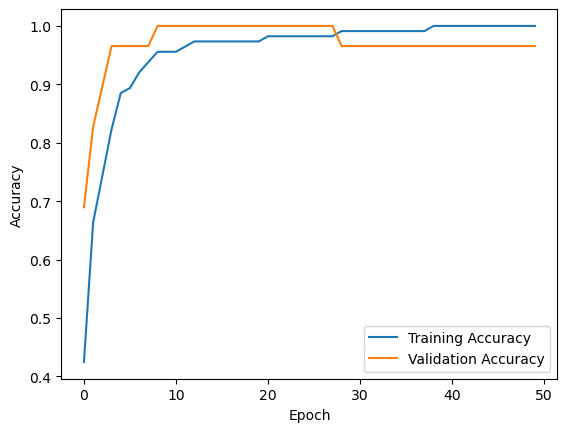

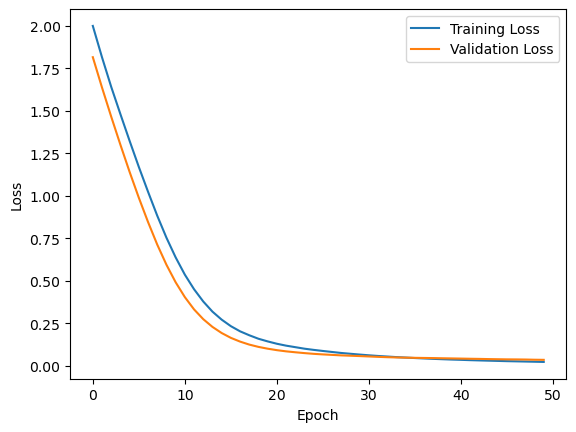

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Save the model in HDF5 format
model.save('my_wine_model.h5')



In [19]:
# Load the HDF5 model
loaded_model = tf.keras.models.load_model('my_wine_model.h5')



In [20]:
# Predict on the test set
predictions = loaded_model.predict(X_test_scaled)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print the first few predictions
print(predicted_classes[:10])


2/2 [==============================] - 0s 1ms/step
[4 3 6 2 6 2 9 6 4 6]


In [22]:
# Example: Assuming new_data is a DataFrame or array with new wine features
new_data_scaled = scaler.transform(X_test_scaled)  # Apply the same scaler used on training data
new_predictions = loaded_model.predict(new_data_scaled)

# Convert the predictions to class labels
new_predicted_classes = np.argmax(new_predictions, axis=1)

# Print the predicted wine qualities or types
print(new_predicted_classes)


2/2 [==============================] - 0s 1ms/step
[7 4 4 7 4 4 4 4 4 4 7 7 4 3 7 4 4 7 4 4 4 4 3 7 4 4 4 7 4 4 4 4 4 4 4 7]


/opt/anaconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
